# Name: John Reddy Peasari
# Assignment : week11

# Machine Learning Classification

*Author: Evan Carey*

*Copyright 2017-2019, BH Analytics, LLC*

## Overview

The purpose of this section is to go over machine learning! We will focus on classification in the context of python (the scikit-learn module). We will include some general concepts of machine learning as well as the specifics of a few different classification algorithms. For further reading, I highly recommend the free ebook titled 'Introduction to Statistical Learning' by Gareth James. A quick web search should find this book near the top of the search results. For even more in-depth coverage of machine learning algorithms, I recommend the book  'Elements of Statistical Learning' by Trevor Hastie (also free online). 

## Classification

In the case where our outcome (target) variable is discrete with a limited number of possible values, we can use classification algorithms to predict the outcome. Imagine a binary outcome with values of 'Yes' and 'No'. We are interested in predicting the probability that the outcome is either 'Yes' or 'No'. It is also possible to predict outcomes with more than two possible values, but we will focus on the binary case here. 

## Libraries

In [2]:
## Import Modules
import os
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.metrics import confusion_matrix
import sklearn
from sklearn import datasets

In [3]:
## Set default figure size to be larger 
## this may only work in matplotlib 2.0+!
matplotlib.rcParams['figure.figsize'] = [10.0,6.0]
## Enable multiple outputs from jupyter cells
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
## Get Version information
print(sys.version)
print("Pandas version: {0}".format(pd.__version__))
print("Matplotlib version: {0}".format(matplotlib.__version__))
print("Numpy version: {0}".format(np.__version__))
print("SciKitLearn version: {0}".format(sklearn.__version__))

3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Pandas version: 1.0.1
Matplotlib version: 3.1.3
Numpy version: 1.18.1
SciKitLearn version: 0.22.1


## Check your working directory

Set your working directory to make paths easier :) 

In [5]:
# Working Directory
import os
print("My working directory:\n" + os.getcwd())
# Set Working Directory 
os.chdir(".")
print("My new working directory:\n" + os.getcwd())

My working directory:
C:\Users\johnp\Downloads\Uploads-week-11
My new working directory:
C:\Users\johnp\Downloads\Uploads-week-11


## Patient Mortality Dataset

We will use a dataset with a binary outcome of mortality as a motivating example.

This is a dataset of patients demographics and disease status, with mortality indicated. The dataset is here: 

`data\healthcare\patientAnalyticFile.csv`

In practice, you most likely would have created a dataset like this from multiple other files after cleaning, reshaping, and joining them. 

You can generalize this setup to any situation with a binary outcome, such as estimating the probability of a customer filing a warranty claim, or the probability of a transaction being fraudulent. 

We will first import this dataset and examine the potential variables to use in our classification algorithm.

In [6]:
## Set print limits
pd.options.display.max_rows = 10
## Import Data
df_patient = pd.read_csv('PatientAnalyticFile.csv')
df_patient

,PatientID,DateOfBirth,Gender,Race,Myocardial_infarction,Congestive_heart_failure,Peripheral_vascular_disease,Stroke,Dementia,Pulmonary,...,Metastatic_solid_tumour,HIV,Obesity,Depression,Hypertension,Drugs,Alcohol,First_Appointment_Date,Last_Appointment_Date,DateOfDeath
0,1,1962-02-27,female,hispanic,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2013-04-27,2018-06-01,NaN
1,2,1959-08-18,male,white,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2005-11-30,2008-11-02,2008-11-02
2,3,1946-02-15,female,white,0,0,0,0,0,0,...,0,1,0,0,1,0,0,2011-11-05,2015-11-13,NaN
3,4,1979-07-27,female,white,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2010-03-01,2016-01-17,2016-01-17
4,5,1983-02-19,female,hispanic,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2006-09-22,2018-06-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,1997-12-19,female,other,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2008-06-14,2018-06-01,NaN
19996,19997,1984-03-31,female,white,0,0,0,0,0,0,...,0,1,0,0,1,0,0,2007-04-24,2018-06-01,NaN
19997,19998,1993-07-04,female,white,0,0,0,0,0,0,...,0,0,1,0,1,0,0,2010-10-16,2018-06-01,NaN
19998,19999,1984-04-17,male,other,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2015-01-04,2018-06-01,NaN


We need to make a variable to indicate mortality. We can do that based on the abscence of 'date of death':

In [7]:
# Create mortality variable
df_patient['mortality'] = \
    np.where(df_patient['DateOfDeath'].isnull(),
             0,1)
# Examine
df_patient['mortality']

0        0
1        1
2        0
3        1
4        0
        ..
19995    0
19996    0
19997    0
19998    0
19999    0
Name: mortality, Length: 20000, dtype: int32

In [8]:
df_patient['mortality'].describe()

count    20000.000000
mean         0.354700
std          0.478434
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: mortality, dtype: float64

In [9]:
df_patient.describe()

,PatientID,Myocardial_infarction,Congestive_heart_failure,Peripheral_vascular_disease,Stroke,Dementia,Pulmonary,Rheumatic,Peptic_ulcer_disease,LiverMild,...,Cancer,LiverSevere,Metastatic_solid_tumour,HIV,Obesity,Depression,Hypertension,Drugs,Alcohol,mortality
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,0.045600,0.043450,0.023950,0.028650,0.031400,0.072650,0.012300,0.009650,0.009250,...,0.050450,0.051450,0.033150,0.006450,0.163450,0.106300,0.302900,0.040050,0.079750,0.354700
std,5773.647028,0.208621,0.203873,0.152897,0.166825,0.174401,0.259568,0.110224,0.097762,0.095733,...,0.218877,0.220919,0.179033,0.080054,0.369785,0.308229,0.459524,0.196081,0.270913,0.478434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5000.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10000.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15000.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,20000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df_patient.dtypes

PatientID                  int64
DateOfBirth               object
Gender                    object
Race                      object
Myocardial_infarction      int64
                           ...  
Alcohol                    int64
First_Appointment_Date    object
Last_Appointment_Date     object
DateOfDeath               object
mortality                  int32
Length: 30, dtype: object

We should change date of birth to be an actual date and calculate age if we want to include it in the model:

In [11]:
# Convert dateofBirth to date
df_patient['DateOfBirth'] = \
    pd.to_datetime(df_patient['DateOfBirth'])
# Calculate age in years as of 2015-01-01
df_patient['Age_years'] = \
    ((pd.to_datetime('2015-01-01') - df_patient['DateOfBirth']).dt.days/365.25)
df_patient['Age_years'].describe()

count    20000.000000
mean        47.247474
std         18.145086
min         15.753593
25%         31.733744
50%         47.099247
75%         62.924025
max         78.743326
Name: Age_years, dtype: float64

## Workflow into scikit-learn


* There are a number of possible ways to prepare data for modeling in scikit-learn. 
* You must end up with a numeric ndarray of inputs (X) and a numeric ndarray matrix of the target (Y)
* I prefer the following workflow:
  * We use pandas to import and clean data
  * We use Patsy to create the X and Y ndarrays
  * Using categorical transformations (dummy coding) as needed
  * Also can generate non-linear terms including splines
  * Use scikit-learn for machine learning

## Use Patsy to Create the Model Matrices

We typically start out with a pandas dataframe for manipulation purposes, then we will use this dataframe as the input to the machine learning library. I created a pandas dataframe above to replicate this process. We will use the dmatrices function from the patsy library to easily generate the design matrices for the machine learning algorithms representing the inputs. THis handles the following:

* drops rows with missing data
* construct one-hot encoding for categorical variables
* optionally adds constant intecercept

In [13]:
df_patient.columns

Index(['PatientID', 'DateOfBirth', 'Gender', 'Race', 'Myocardial_infarction',
       'Congestive_heart_failure', 'Peripheral_vascular_disease', 'Stroke',
       'Dementia', 'Pulmonary', 'Rheumatic', 'Peptic_ulcer_disease',
       'LiverMild', 'Diabetes_without_complications',
       'Diabetes_with_complications', 'Paralysis', 'Renal', 'Cancer',
       'LiverSevere', 'Metastatic_solid_tumour', 'HIV', 'Obesity',
       'Depression', 'Hypertension', 'Drugs', 'Alcohol',
       'First_Appointment_Date', 'Last_Appointment_Date', 'DateOfDeath',
       'mortality', 'Age_years'],
      dtype='object')

In [14]:
## Create formula for all variables in model
vars_remove = ['PatientID','First_Appointment_Date','DateOfBirth',
               'Last_Appointment_Date','DateOfDeath','mortality']
vars_left = set(df_patient.columns) - set(vars_remove)
formula = "mortality ~ " + " + ".join(vars_left)
formula

'mortality ~ Pulmonary + Hypertension + Rheumatic + Paralysis + Myocardial_infarction + Renal + Obesity + Alcohol + Stroke + Dementia + Peptic_ulcer_disease + HIV + Diabetes_without_complications + LiverSevere + Peripheral_vascular_disease + Age_years + Diabetes_with_complications + Gender + Metastatic_solid_tumour + Depression + Congestive_heart_failure + Race + Cancer + LiverMild + Drugs'

In [15]:
## frac = 1 ndicates the complete dataset
df_patient_sub = \
    df_patient.sample(frac=1,   
                     random_state=32)    
## use Patsy to create model matrices
Y,X = dmatrices(formula,
                df_patient_sub)

In [16]:
Y

DesignMatrix with shape (20000, 1)
  mortality
          0
          0
          1
          1
          0
          0
          1
          1
          0
          0
          1
          0
          1
          0
          1
          0
          1
          0
          0
          1
          0
          1
          0
          0
          0
          0
          1
          1
          0
          0
  [19970 rows omitted]
  Terms:
    'mortality' (column 0)
  (to view full data, use np.asarray(this_obj))

In [17]:
X

DesignMatrix with shape (20000, 28)
  Columns:
    ['Intercept',
     'Gender[T.male]',
     'Race[T.hispanic]',
     'Race[T.other]',
     'Race[T.white]',
     'Pulmonary',
     'Hypertension',
     'Rheumatic',
     'Paralysis',
     'Myocardial_infarction',
     'Renal',
     'Obesity',
     'Alcohol',
     'Stroke',
     'Dementia',
     'Peptic_ulcer_disease',
     'HIV',
     'Diabetes_without_complications',
     'LiverSevere',
     'Peripheral_vascular_disease',
     'Age_years',
     'Diabetes_with_complications',
     'Metastatic_solid_tumour',
     'Depression',
     'Congestive_heart_failure',
     'Cancer',
     'LiverMild',
     'Drugs']
  Terms:
    'Intercept' (column 0)
    'Gender' (column 1)
    'Race' (columns 2:5)
    'Pulmonary' (column 5)
    'Hypertension' (column 6)
    'Rheumatic' (column 7)
    'Paralysis' (column 8)
    'Myocardial_infarction' (column 9)
    'Renal' (column 10)
    'Obesity' (column 11)
    'Alcohol' (column 12)
    'Stroke' (column 13)
   

## Split into Testing and Training Samples

* The first step is to set aside a test sample of data that will allow us to estimate the generalization error post-fit. This protects against overfitting. 
* We can use “tuple unpacking” to assign the values (very pythonic :)
* We can assign a random seed (state) and fraction to split.

 For simple random splits, scikit-learn has a function `train_test_split()`

In [18]:
## Split Data into training and sample
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X,
                     np.ravel(Y), # prevents dimensionality error later!
                     test_size=0.20,
                     random_state=42)

## Confirm the Output Dimensions

* We can confirm the dimensions of the data are the same within test and train
* The proportion should also be close to the test_size argument. 

In [19]:
## Confirm dimensions
X_train.shape

(16000, 28)

In [20]:
X_test.shape

(4000, 28)

In [21]:
y_train.shape

(16000,)

In [22]:
y_test.shape

(4000,)

# Assignment Week 11
## Question 1
### Among the different classification models included in the Python notebook, which model had the best overall performance? Support your response by referencing appropriate evidence. 

In [23]:
get_results(result_scores) ### This table was generated using the code from the cell 88 - 131

NameError: name 'get_results' is not defined

### It was observed that the model "RandomForest_CV2" yielded the best training accuracy when compared to other classification models. RandomForest_CV2 " model was generated using grid search for cross validation where hyperparameter tuning was performed using it. It was observed that max_depth parameter of 7 yielded highest training accuracy. But the model gave quite less testing acuracy when compared to other classification models. Finally, it was observed that the model "Logistic_SL1_C_auto" i.e., scaling with regularizaton gave the resonable and high training and testing accuracy when compared to other classification models.GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

## Question 2
### Fitting Logistic Regression using various solvers for the complete dataset

In [25]:
result_scores_logistic = {}   ## Create dict to store all these results:
import time, datetime
from sklearn.linear_model import LogisticRegression

solvers = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"] ## Varous solvers for logistic regression
for i in solvers:                                            ## Interating through each solver and fit a logistic regression with a specific solver
    start = datetime.datetime.now()
#     time.sleep(10)
    clf = LogisticRegression(fit_intercept=True,  solver=i,max_iter = 10000)
    clf.fit(X_train,y_train)
    end = datetime.datetime.now()
    diff = (end - start) ## Getting the execution time of a single model in seconds
    diff_seconds = int(diff.total_seconds())
    cm = clf.score(X_train,y_train) 
    result_scores_logistic['Logistic' + " " + i] = (sklearn.metrics.accuracy_score(y_train,clf.predict(X_train)),sklearn.metrics.accuracy_score(y_test,clf.predict(X_test)),diff_seconds) ## Score the Model on Training and Testing Set


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
## Create Function to Print Results
def get_results_logistic(x1):
    print("\n{0:20}  {1:4}    {2:4} {3:6}".format('Model','Train','Test',"Time"))
    print('-------------------------------------------')
    for i in x1.keys():
        print("{0:20}   {1:<6.4}   {2:<6.4} {3:<6.4}".format(i,x1[i][0],x1[i][1], float(x1[i][2])))

## Question 3 
### Compare the results of the models in terms of their accuracy (use this as the performance metric to assess generalizability error on the holdout subset) and the time taken (use appropriate timing function). Summarize your results via a table with the following structure: 

In [27]:
get_results_logistic(result_scores_logistic)


Model                 Train    Test Time  
-------------------------------------------
Logistic newton-cg     0.7464   0.7432 0.0   
Logistic lbfgs         0.7465   0.743  0.0   
Logistic liblinear     0.7463   0.7428 0.0   
Logistic sag           0.7464   0.7432 31.0  
Logistic saga          0.7464   0.7432 45.0  


## Question 4 :: Based on the results, which solver yielded the best results? Explain the basis for ranking the models - did you use training subset accuracy? Holdout subset accuracy? Time of execution? All three? Some combination of the three?

### It was observed that all the solvers in the logistic regression gave almost exactly accuracy results. Five different solvers were implemented with logistic regression. The solver lbfgs was observed to be the best solver. I have made this conclusion using highest training and testing accuracy.


## First Model: Logistic Regression
## Assignment Question 1: Finding the best model among all the classification models

* We will start with a basic logistic regression model.
* The flow will be similar for other models
* Call and save model object with initial parameters, then call the fit() method to perform the optimization
* Then call other summary methods post fit to explore the model

Check the docs: 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [88]:
## import linear model
from sklearn.linear_model import LogisticRegression
## Define model parameters
## can implement penalties, but check docs for appropriate solver
clf = LogisticRegression(fit_intercept=True, # already have the intercept
                                      solver='liblinear') # could change to lbfgs!
## fit model using data with .fit
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

How do we know if this is a good model? What makes a good model? Let's make predictions, is this a good model? Which parameters are most important?

In [89]:
## Make predictions on training dataset
## training error?
clf.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [90]:
## can also predict probabilities
clf.predict_proba(X_train)

array([[0.89421304, 0.10578696],
       [0.88348911, 0.11651089],
       [0.32843137, 0.67156863],
       ...,
       [0.60711869, 0.39288131],
       [0.92560274, 0.07439726],
       [0.50209904, 0.49790096]])

## Model Summaries

* We can extract the model coefficients with the .coef_ attribute.

In [91]:
## Get coefficients
clf.coef_
clf.coef_.shape

array([[-2.0869168 , -0.05158328,  0.01197148,  0.01575319, -0.01828697,
         0.78973851,  0.04358947,  0.43274266,  1.07918877,  0.01973254,
         0.53698977,  0.01932497,  0.063653  ,  0.25968019,  0.57911095,
        -0.05854274,  0.51782087, -0.1818799 ,  1.01427688,  0.07134668,
         0.44168111,  0.28384971,  0.76761013,  0.06855782, -0.03909414,
        -0.03456713,  0.13089186,  0.14541601]])

(1, 28)

## Assessing the Model Score (accuracy)

* The concept of error is a bit different for a binary outcome than the continuous case. 
* We can construct error to be a function of the number of incorrect predictions. 

In [92]:
## get mean accuracy
clf.score(X_train,y_train) 

0.7463125

In this case, our model is accurate about 73% of the time! We can understand what that means by looking at the predictions against the actual outcomes. This is called a confusion matrix.

| True negative  | False positive |
|----------------|----------------|
| False negative | True positive |

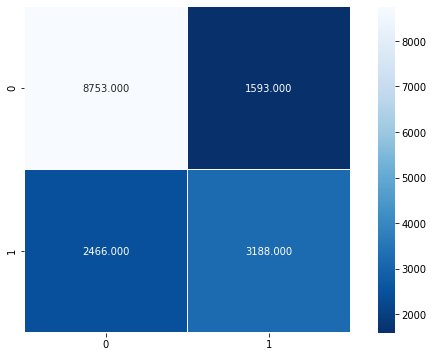

In [93]:
## get confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_train,clf.predict(X_train))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

In [94]:
## get classification metrics
print(sklearn.metrics.classification_report(y_train,
                                            clf.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81     10346
         1.0       0.67      0.56      0.61      5654

    accuracy                           0.75     16000
   macro avg       0.72      0.70      0.71     16000
weighted avg       0.74      0.75      0.74     16000



In [95]:
## get accuracy
sklearn.metrics.accuracy_score(y_train,
                               clf.predict(X_train))

0.7463125

Another option for assessing our model is to use the Kappa statistic (instead of accuracy). The Kappa statistics is a measure of rater agreement, with values between -1 and 1. 

* A value of 0 indicates the classifier is not better than chance
* A value of 1 indicates the classifier is a perfect predictor
* A value of -1 indicates the classifier is always wrong!

In [96]:
# Get kappa
sklearn.metrics.cohen_kappa_score(y_train,
                                  clf.predict(X_train))

0.424747201090075

## Keep Track of Scores Across Models

I am going to write a small function that will print the scores from a dict so we can compare the models. I will store the model scores in the dict as well. 

In [97]:
## Create dict to store all these results:
result_scores = {}
## Score the Model on Training and Testing Set
result_scores['Logistic'] = \
            (sklearn.metrics.accuracy_score(y_train,clf.predict(X_train)),
             sklearn.metrics.accuracy_score(y_test,clf.predict(X_test)))

In [98]:
## Create Function to Print Results
def get_results(x1):
    print("\n{0:20}   {1:4}    {2:4}".format('Model','Train','Test'))
    print('-------------------------------------------')
    for i in x1.keys():
        print("{0:20}   {1:<6.4}   {2:<6.4}".format(i,x1[i][0],x1[i][1]))

In [99]:
get_results(result_scores)


Model                  Train    Test
-------------------------------------------
Logistic               0.7463   0.7428


## Comparison to the Null Model

Is that a good score for accuracy? Compared to what? We can consider a null model of simply predicting the most frequent class as a base model. Without any other information, I may predict based simply on the distribution of the outcome.

In [100]:
## Null information rate
1 - y_train.mean()

array(0.646625)

Scikitlearn has a built in dummy classifier that works similarly:

In [102]:
## Dummy classifier
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='most_frequent',
                      random_state=0)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)  

DummyClassifier(constant=None, random_state=0, strategy='most_frequent')

0.646625

In [103]:
## Score the Model on Training and Testing Set
result_scores['Null'] = \
            (sklearn.metrics.accuracy_score(y_train,clf.predict(X_train)),
             sklearn.metrics.accuracy_score(y_test,clf.predict(X_test)))

In [104]:
get_results(result_scores)


Model                  Train    Test
-------------------------------------------
Logistic               0.7463   0.7428
Null                   0.6466   0.64  


## Regularized Linear Regression

- The next family of models we will consider are called regularized linear regression. 
- This includes LASSO, Elastic Net, and Ridge regression. 
- These are penalized forms of a regular linear regression (like a logistic regression). 
- The basic idea is that we can place a penalty on the estimated coefficients from the general linear model, 'pushing' them towards zero. 
- If the coefficients are related to the outcome, they will 'push' back against our penalty. 
- The stronger the relationship (or the stronger the predictor), the stronger they will 'push' back. 
- The overall effect is that the coefficients are all shrunk towards zero. If the variable is not strongly related to the outcome, it will be shrunk close to zero, or possibly all the way to zero. 
- This can give us effective variable selection, where the weak variables are eliminated since their coefficients are shrunk all the way to zero. 
- Depending on how we apply the penalty, variables will either be shrunk all the way to zero (this is called the LASSO), or they will be shrunk to a small number, but still above zero (This is called ridge regression).
- We can also apply a mixture of the two penalties, which is called the elastic net regression. 
- A natural question you might ask is, how do I pick the best model?
    + LASSO?
    + Ridge regression?
    + Elastic net (the mixture of the two)?
- Also, how strong of a penalty should I pick?
    + A very weak penalty, so it is essentially just a logistic regression?
    + A very strong penalty, so almost all the coefficients are equal to zero?
    + Maybe something in between?

## Logistic regression with L1 penalty

If we implement an L1 penalty using the logistic regression function, we are implementing a LASSO regression. Under an L2 penalty, coefficients can actually be set all the way to 0, thus they are eliminated (spare models, feature selection). It is called L1 because the penalty is linked to the **absolute value** of the coefficient. From the scikit-learn docs, here is the cost function:

$$\min_{w, c} \|w\|_1 + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1).$$

In [105]:
## Logistic Regression with l1 penalty
## Specify penalty directly as C = 1
clf = linear_model.LogisticRegression(penalty='l1',
                                      C=1, solver = 'liblinear') # specify penalty
clf.fit(X_train,y_train)
## get confusion matrix
confusion_matrix(y_train,clf.predict(X_train))

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

array([[8753, 1593],
       [2464, 3190]], dtype=int64)

In [106]:
## get accuracy
sklearn.metrics.accuracy_score(y_train,clf.predict(X_train))

0.7464375

In [107]:
## Get kappa
sklearn.metrics.cohen_kappa_score(y_train,clf.predict(X_train))

0.4250784343866866

In [108]:
## get classification metrics
print(sklearn.metrics.classification_report(y_train,
                                            clf.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81     10346
         1.0       0.67      0.56      0.61      5654

    accuracy                           0.75     16000
   macro avg       0.72      0.71      0.71     16000
weighted avg       0.74      0.75      0.74     16000



In [109]:
## Score the Model on Training and Testing Set
result_scores['Logistic_L1_C_1'] = \
            (sklearn.metrics.accuracy_score(y_train,clf.predict(X_train)),
             sklearn.metrics.accuracy_score(y_test,clf.predict(X_test)))
get_results(result_scores)


Model                  Train    Test
-------------------------------------------
Logistic               0.7463   0.7428
Null                   0.6466   0.64  
Logistic_L1_C_1        0.7464   0.7425


What about other values for C? We could try 0.1, or 10?

In [110]:
## Logistic Regression with l1 penalty
## Specify penalty directly as C = 0.1
clf = linear_model.LogisticRegression(penalty='l1',
                                      C=0.1, solver = 'liblinear') # specify penalty
clf.fit(X_train,y_train)
## Score the Model on Training and Testing Set
result_scores['Logistic_L1_C_01'] = \
            (sklearn.metrics.accuracy_score(y_train,clf.predict(X_train)),
             sklearn.metrics.accuracy_score(y_test,clf.predict(X_test)))
get_results(result_scores)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


Model                  Train    Test
-------------------------------------------
Logistic               0.7463   0.7428
Null                   0.6466   0.64  
Logistic_L1_C_1        0.7464   0.7425
Logistic_L1_C_01       0.7471   0.7425


In [111]:
## Logistic Regression with l1 penalty
## Specify penalty directly as C = 0.1
clf = linear_model.LogisticRegression(penalty='l1',
                                      C=10, solver = 'liblinear') # specify penalty
clf.fit(X_train,y_train)
## Score the Model on Training and Testing Set
result_scores['Logistic_L1_C_10'] = \
            (sklearn.metrics.accuracy_score(y_train,clf.predict(X_train)),
             sklearn.metrics.accuracy_score(y_test,clf.predict(X_test)))
get_results(result_scores)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


Model                  Train    Test
-------------------------------------------
Logistic               0.7463   0.7428
Null                   0.6466   0.64  
Logistic_L1_C_1        0.7464   0.7425
Logistic_L1_C_01       0.7471   0.7425
Logistic_L1_C_10       0.7463   0.743 


## Selecting Parameters via Cross Validation

We should be validating this parameter 'C' somehow. We should not be using the test data to do that however! We need another dataset, called the validation dataset. We could further split our training data into validation and training. Another option would be to implement k-folds cross validation. 

In [112]:
## Select the alpha through cross validation (k-folds leave one out)
# auto generate 20 values between 1e-4 and 1e4 on log scale
clf = linear_model.LogisticRegressionCV(cv=5,
                                        Cs=20, ## takes awhile to fit 20 models!
                                        penalty='l1',
                                        solver='liblinear') 
clf.fit(X_train,y_train)

LogisticRegressionCV(Cs=20, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l1', random_state=None, refit=True, scoring=None,
                     solver='liblinear', tol=0.0001, verbose=0)

In [113]:
## how many C's were fit?
clf.Cs
## which C's were fit?
clf.Cs_
## Which C was 'best'? 
clf.C_

20

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

array([0.08858668])

In [114]:
## Score the Model on Training and Testing Set
result_scores['Logistic_L1_C_auto'] = \
            (sklearn.metrics.accuracy_score(y_train,clf.predict(X_train)),
             sklearn.metrics.accuracy_score(y_test,clf.predict(X_test)))
get_results(result_scores)


Model                  Train    Test
-------------------------------------------
Logistic               0.7463   0.7428
Null                   0.6466   0.64  
Logistic_L1_C_1        0.7464   0.7425
Logistic_L1_C_01       0.7471   0.7425
Logistic_L1_C_10       0.7463   0.743 
Logistic_L1_C_auto     0.7471   0.7418


## Scaling / Pipeline

* We should consider scaling when we use regularization methods. 
* We can construct a pipeline to avoid having to apply the same transformation over and over again.
* We must use the StandardScaler() function here.

In [115]:
## LASSO (L1) regression, set alpha
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
## set our transformation
scaler = preprocessing.StandardScaler()

## set our model
clf = linear_model.LogisticRegressionCV(cv=5,
                                        Cs=20, ## takes awhile to fit 20 models!
                                        penalty='l1',
                                        solver='liblinear') 
## put together in pipeline
pipe1 = Pipeline([("scale", scaler),
                  ("LASSO", clf)])
pipe1.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('LASSO',
                 LogisticRegressionCV(Cs=20, class_weight=None, cv=5,
                                      dual=False, fit_intercept=True,
                                      intercept_scaling=1.0, l1_ratios=None,
                                      max_iter=100, multi_class='auto',
                                      n_jobs=None, penalty='l1',
                                      random_state=None, refit=True,
                                      scoring=None, solver='liblinear',
                                      tol=0.0001, verbose=0))],
         verbose=False)

You can extract the elements from the pipline using their names. By calling `named_steps`, you get a dict of the steps:

In [117]:
pipe1.named_steps

{'scale': StandardScaler(copy=True, with_mean=True, with_std=True),
 'LASSO': LogisticRegressionCV(Cs=20, class_weight=None, cv=5, dual=False,
                      fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                      max_iter=100, multi_class='auto', n_jobs=None,
                      penalty='l1', random_state=None, refit=True, scoring=None,
                      solver='liblinear', tol=0.0001, verbose=0)}

In [118]:
pipe1.named_steps['LASSO']

LogisticRegressionCV(Cs=20, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l1', random_state=None, refit=True, scoring=None,
                     solver='liblinear', tol=0.0001, verbose=0)

In [119]:
pipe1.named_steps['LASSO'].C_

array([0.01274275])

We can evaluate this like before:

In [120]:
## Score the Model on Training and Testing Set
result_scores['Logistic_SL1_C_auto'] = \
            (sklearn.metrics.accuracy_score(y_train,pipe1.predict(X_train)),
             sklearn.metrics.accuracy_score(y_test,pipe1.predict(X_test)))
get_results(result_scores)


Model                  Train    Test
-------------------------------------------
Logistic               0.7463   0.7428
Null                   0.6466   0.64  
Logistic_L1_C_1        0.7464   0.7425
Logistic_L1_C_01       0.7471   0.7425
Logistic_L1_C_10       0.7463   0.743 
Logistic_L1_C_auto     0.7471   0.7418
Logistic_SL1_C_auto    0.7469   0.744 


## Adding model complexity with interactions and polynomials

* We can add polynomials as well as interactions using PolynomialFeatures. 
* We must give the degree argument. Polynomials up to that degree will be considered, and interactions between d-1 terms.
* This is a lot of parameters added into the model! That is why we are using LASSO to shrink some and avoid overfitting…

In [121]:
#### This takes awhile to run! 
## try multiple polynomials with a LASSO regulaizer
## use pipeline for pre-processing
from sklearn.preprocessing import PolynomialFeatures

## set our transformation
scaler = preprocessing.StandardScaler()

## polynomials
poly_feat = PolynomialFeatures(degree=2,include_bias=False)

## set our model
clf = linear_model.LogisticRegressionCV(cv=3,
                                        Cs=5,
                                        penalty='l1',
                                        solver='liblinear') 
## put together in pipeline
pipe2 = Pipeline([("scale", scaler),
                  ("poly",poly_feat),
                  ("LASSO", clf)])
# pipe2.fit(X_train,y_train)

In [55]:
## Score the Model on Training and Testing Set
# result_scores['LogisticL1_SP_C_auto'] = \
#             (sklearn.metrics.accuracy_score(y_train,pipe1.predict(X_train)),
#              sklearn.metrics.accuracy_score(y_test,pipe1.predict(X_test)))
# get_results(result_scores)

## Random forest

- Another popular classification algorithm is the random forest. 
- In order to understand a random forest, you should first think about a decision tree. 
- We can consider modeling data simply by making cutpoints on our predictors, then splitting the decision of the outcome. 
- Visually, that might look like this in the context of our data:
- If age < 40, deny credit card
- If age > 40, then:
    + If income > 5, accept credit card
    + If income < 5, accept credit card
    
- Decision trees have a very nice appeal in that they are easy to understand and visualize. You can simply make a score card, and a human could easily make a decision on whether the outcome is yes or no. 
- But they are not very accurate or flexible individually! How can we have a good model from a single decision tree? It seems unlikely. 
- But what if we created many different decision trees, based on different subsets of the data? 
- We could take random samples of the data, then get an optimal decision tree using a subset of the predictors for each sample. 
- Each individual tree isn't that great, but perhaps the population of all those trees (the ensemble) would be good?
- That is the intuition behind a random forest!

The parameters of interest for tuning are `n_estimators` and `max_features`.   
  
`n_estimators` is the number of trees in the forest. Generally, the larger the number of tree, the better the prediction and more stable the algorithm. However, the algorihm takes longer the more trees we have. 
  
`max_features` is the maximum number of features (variables) to consider for each tree split. Not every tree will use every parameter. It is often suggested to use the square root of the number of features for classification here. 

In [122]:
#### Fit Random Forest
## Random Forests
from sklearn import ensemble
clf = ensemble.RandomForestClassifier(n_estimators=100, 
                                      max_features=10,
                                      random_state=42)
clf.fit(X_train,y_train)
## get confusion matrix
confusion_matrix(y_train,clf.predict(X_train))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

array([[10331,    15],
       [   21,  5633]], dtype=int64)

In [124]:
## Score the Model on Training and Testing Set
result_scores['RandomForest_noCV'] = \
            (sklearn.metrics.accuracy_score(y_train,clf.predict(X_train)),
             sklearn.metrics.accuracy_score(y_test,clf.predict(X_test)))
get_results(result_scores)


Model                  Train    Test
-------------------------------------------
Logistic               0.7463   0.7428
Null                   0.6466   0.64  
Logistic_L1_C_1        0.7464   0.7425
Logistic_L1_C_01       0.7471   0.7425
Logistic_L1_C_10       0.7463   0.743 
Logistic_L1_C_auto     0.7471   0.7418
Logistic_SL1_C_auto    0.7469   0.744 
RandomForest_noCV      0.9978   0.6897


## Grid Search for Manual Cross Validation

There is no RandomForestCV function....what to do? 


We can specify a grid search across a range of hyperparameters. 

In [125]:
from sklearn.model_selection import GridSearchCV
## specify grid
parameters = {'n_estimators':(50,100,200,300),
              'max_features':(5,10,15,20)}
## specify model without hyperparameters
rf_model = ensemble.RandomForestClassifier(random_state=32)
## specify search with model
clf = GridSearchCV(rf_model,
                   parameters,
                   cv=5,
                   return_train_score=True)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=32,
                                  

In [126]:
## explore best hyperparameters
clf.best_params_

{'max_features': 20, 'n_estimators': 300}

In [127]:
## add model score
## Score the Model on Training and Testing Set
result_scores['RandomForest_CV'] = \
            (sklearn.metrics.accuracy_score(y_train,clf.predict(X_train)),
             sklearn.metrics.accuracy_score(y_test,clf.predict(X_test)))
get_results(result_scores)


Model                  Train    Test
-------------------------------------------
Logistic               0.7463   0.7428
Null                   0.6466   0.64  
Logistic_L1_C_1        0.7464   0.7425
Logistic_L1_C_01       0.7471   0.7425
Logistic_L1_C_10       0.7463   0.743 
Logistic_L1_C_auto     0.7471   0.7418
Logistic_SL1_C_auto    0.7469   0.744 
RandomForest_noCV      0.9978   0.6897
RandomForest_CV        0.9978   0.6923


In [128]:
clf.cv_results_

{'mean_fit_time': array([ 0.68338914,  1.23517108,  2.48894906,  3.73244753,  0.94711595,
         1.78928566,  3.499506  ,  5.91873088,  1.59184256,  2.77658029,
         4.822787  ,  7.26125779,  1.5592968 ,  3.43994203,  6.30519004,
        10.00100307]),
 'std_fit_time': array([0.02263154, 0.02039614, 0.02435061, 0.01465938, 0.08078149,
        0.04175493, 0.0436425 , 0.45475914, 0.08849764, 0.24534329,
        0.13617393, 0.11920663, 0.08232472, 0.49161664, 0.38566691,
        0.78427924]),
 'mean_score_time': array([0.04139657, 0.06760674, 0.13747859, 0.20587053, 0.03794179,
        0.07189326, 0.13373647, 0.22506013, 0.04562106, 0.07640953,
        0.13867826, 0.20969014, 0.03836212, 0.08234425, 0.14727273,
        0.20855589]),
 'std_score_time': array([0.00467418, 0.00107072, 0.00135697, 0.00209902, 0.00468266,
        0.00779078, 0.00092968, 0.01742322, 0.00560766, 0.0056185 ,
        0.01120647, 0.01097023, 0.00431585, 0.0174123 , 0.01505431,
        0.00956511]),
 'param_ma

Let's add one more adjustment to the RandomForest. Since we are still overfitting, let's try optimizing the depth of the trees...

In [129]:
from sklearn.model_selection import GridSearchCV
## specify grid
parameters2 = {'max_depth':(2,5,7,10,20)}
## specify model without hyperparameters
rf_model = ensemble.RandomForestClassifier(max_features=20,
                                           n_estimators=100,
                                           random_state=32)
## specify search with model
clf = GridSearchCV(rf_model,
                   parameters2,
                   cv=5,
                   return_train_score=True)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=20,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=32,
                                      

In [130]:
## explore best hyperparameters
clf.best_params_

{'max_depth': 7}

In [131]:
## add model score
## Score the Model on Training and Testing Set
result_scores['RandomForest_CV2'] = \
            (sklearn.metrics.accuracy_score(y_train,clf.predict(X_train)),
             sklearn.metrics.accuracy_score(y_test,clf.predict(X_test)))
get_results(result_scores)


Model                  Train    Test
-------------------------------------------
Logistic               0.7463   0.7428
Null                   0.6466   0.64  
Logistic_L1_C_1        0.7464   0.7425
Logistic_L1_C_01       0.7471   0.7425
Logistic_L1_C_10       0.7463   0.743 
Logistic_L1_C_auto     0.7471   0.7418
Logistic_SL1_C_auto    0.7469   0.744 
RandomForest_noCV      0.9978   0.6897
RandomForest_CV        0.9978   0.6923
RandomForest_CV2       0.7542   0.737 
